In [ ]:
!pip install pandas
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linspace
from scipy import pi,sqrt,exp
from scipy.special import erf
from pylab import plot,show
import random
from sklearn.preprocessing import MinMaxScaler


In [ ]:
!pip install google.colab
from google.colab import drive
drive.mount('/content/d')

Drive already mounted at /content/d; to attempt to forcibly remount, call drive.mount("/content/d", force_remount=True).


In [ ]:
file_path = '/content/d/MyDrive/final_project/Data_for_Urgency_Model.xlsx'

In [ ]:
#standardisation of priority coulmn

def standardize_priority(filepath):
    """Standardizes the values in the 'Priority' column of an Excel file.

    Parameters:
        filepath (str): The file path to the Excel file.

    Returns:
        pandas.DataFrame: The DataFrame with the 'Priority' column standardized.
    """

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filepath)


    # Convert all values in the priority column to lowercase
    df['Priority'] = df['Priority'].str.lower()


    # Define the priority mapping dictionary
    priority_map = {
        1: ['stat'],
        2: ['high'],
        3: ['routine']
    }


    # Iterate through the priority mapping dictionary and replace values in the priority column with their corresponding priority
    for priority, keywords in priority_map.items():
        for keyword in keywords:
            df['Priority'] = df['Priority'].replace(keyword, priority)


    # Convert the values in the priority column to integers
    df['Priority'] = pd.to_numeric(df['Priority'], errors='coerce')


    return df

    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(file_path)

    # Convert all values in the priority column to lowercase
    df['Priority'] = df['Priority'].str.lower()

    # Define the priority mapping dictionary
    priority_map = {
        1: ['stat'],
        2: ['high'],
        3: ['routine']
    }

    # Iterate through the priority mapping dictionary and replace values in the priority column with their corresponding priority
    for priority, keywords in priority_map.items():
        for keyword in keywords:
            df['Priority'] = df['Priority'].replace(keyword, priority)

    # Convert the values in the priority column to integers
    df['Priority'] = pd.to_numeric(df['Priority'], errors='coerce')

    return df


In [ ]:
df = standardize_priority(file_path)
df

,Tenant DESC,Priority,Referring Physician,Patient Class,Exam Description,Exam Group,Status,Ordered,First Image Acquired,Dictated,Transcribed,Reported,wRVU,Modality,Number of Images,Study_Count_2022
0,AVERA,3,NaN,Inpatient,MRI brain wo IV,NaN,REPORTED,00:00:00,00:30:07,00:41:03,NaN,00:43:39,NaN,MAGNETIC RESONANCE,868.0,774372
1,AVERA,3,NaN,Outpatient,XR knee BI 4V,NaN,REPORTED,00:07:00,00:48:47,00:58:36,NaN,00:02:18,NaN,DIGITAL X-RAY,5.0,774372
2,AVERA,3,NaN,Inpatient,XR chest 1V portable,NaN,REPORTED,00:00:00,00:15:30,00:29:17,NaN,00:31:55,NaN,DIGITAL X-RAY,1.0,774372
3,AVERA,3,NaN,Outpatient,US Thyroid,NaN,REPORTED,00:30:00,00:31:29,NaN,NaN,00:50:47,NaN,ULTRASOUND,41.0,774372
4,AVERA,3,NaN,Outpatient,XR hand LT min 3V,NaN,REPORTED,00:07:00,00:01:52,00:17:40,NaN,00:20:51,NaN,DIGITAL X-RAY,4.0,774372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ATLANTIC,3,Anastasiya Deem,Outpatient,BREAST SCREENING W/TOMO; BILATERAL; WOC,NaN,REPORTED,00:23:17,00:26:59,NaN,NaN,00:57:04,NaN,MAMMOGRAPHY,8.0,73465
19996,ATLANTIC,1,Madelyn Justice,Emergency,"FOOT,COMP (MIN 3 VIEWS); RIGHT",NaN,REPORTED,00:38:39,00:49:47,NaN,NaN,00:08:35,NaN,GENERAL RADIOLOGY,3.0,73465
19997,ATLANTIC,3,Nicki Akstinas,Outpatient,"BONE DENSITY, SPINE & HIP; WOC",NaN,REPORTED,00:55:00,00:10:38,NaN,NaN,00:25:34,NaN,OUTSIDE IMAGE,8.0,73465
19998,ATLANTIC,3,Daniel Kelley,Outpatient,"BIOPSY, THYROID; PERCUTANEOUS CORE NEEDLE, ULT...",NaN,REPORTED,00:07:49,00:02:30,NaN,NaN,00:05:17,NaN,ULTRASOUND,NaN,73465


In [ ]:
#Fill the blanck values in the column 'Patient Class' with NaN
df['Patient Class'].fillna(" ")
df['Patient Class']=df['Patient Class'].str.lower()
df['Patient Class'].unique()

array(['inpatient', 'outpatient', 'unknown', nan, 'emergency',
       'pre-admit'], dtype=object)

In [ ]:
df['Exam Description'] = df['Exam Description'].fillna("unknown")

In [ ]:
#Deleting unnecessary columns
def remove_columns(df, columns):
  return df.drop(columns=columns)
df=remove_columns(df, ['Exam Group', 'Referring Physician', 'Status', 'Ordered', 'First Image Acquired', 'Dictated', 'Transcribed', 'Reported', 'wRVU',
                    'Number of Images', 'Study_Count_2022'])

In [ ]:
file_path2 = '/content/d/MyDrive/final_project/Dictionary.xlsx'

In [ ]:
#Creating "Body part" column
def add_body_part_column(df, file_path2, sheet_name):
    """
    Adds a 'body part' column to a DataFrame based on the values in an Excel file.

    Parameters:
    df (pandas.DataFrame): The DataFrame to add the 'body part' column to.
    file_path (str): The file path of the Excel file to read from.
    sheet_name (str): The name of the sheet in the Excel file to read from.

    Returns:
    pandas.DataFrame: The original DataFrame with the 'body part' column added.
    """
    # Read Excel file into a pandas DataFrame
    df_excel = pd.read_excel(file_path2, sheet_name=sheet_name)

    # Create a dictionary to map "Description contains" to "Body part" values
    sub_dict = {}
    for index, row in df_excel.iterrows():
        body_part = row['Body part']
        desc_contains = row['Description contains']
        sub_dict[desc_contains] = body_part

    # Create 'body_part' column based on 'Exam Description'
    body_part_list = []
    for index, row in df.iterrows():
        exam_desc = row['Exam Description']
        body_part = 'UNKNOWN'
        for desc_contains, part in sub_dict.items():
            if desc_contains.lower() in exam_desc.lower():
                body_part = part
                break
        body_part_list.append(body_part)

    df['Body Part'] = body_part_list
    df['Body Part'] = df['Body Part'].str.lower()

    return df


In [ ]:
df=add_body_part_column(df, file_path2, sheet_name='Description to body part')

In [ ]:
df

,Tenant DESC,Priority,Patient Class,Exam Description,Modality,Body Part
0,AVERA,3,inpatient,MRI brain wo IV,MAGNETIC RESONANCE,brain
1,AVERA,3,outpatient,XR knee BI 4V,DIGITAL X-RAY,knee
2,AVERA,3,inpatient,XR chest 1V portable,DIGITAL X-RAY,chest
3,AVERA,3,outpatient,US Thyroid,ULTRASOUND,thyroid
4,AVERA,3,outpatient,XR hand LT min 3V,DIGITAL X-RAY,hand
...,...,...,...,...,...,...
19995,ATLANTIC,3,outpatient,BREAST SCREENING W/TOMO; BILATERAL; WOC,MAMMOGRAPHY,breast
19996,ATLANTIC,1,emergency,"FOOT,COMP (MIN 3 VIEWS); RIGHT",GENERAL RADIOLOGY,foot
19997,ATLANTIC,3,outpatient,"BONE DENSITY, SPINE & HIP; WOC",OUTSIDE IMAGE,hip
19998,ATLANTIC,3,outpatient,"BIOPSY, THYROID; PERCUTANEOUS CORE NEEDLE, ULT...",ULTRASOUND,breast


In [ ]:
df['Modality'].unique()

array(['MAGNETIC RESONANCE', 'DIGITAL X-RAY', 'ULTRASOUND',
       'COMPUTED TOMOGRAPHY', 'MAMMOGRAPHY', 'BD', 'NUCLEAR MEDICINE',
       'INTERVENTIONAL RADIOLOGY', 'ES', 'FLUOROSCOPY', 'OUTSIDE IMAGE',
       'POSITRON EMISSION TOMOGRAPHY', 'SR', 'SC', 'GENERAL RADIOLOGY',
       'BONE DENSITY'], dtype=object)

In [ ]:
#Creating standartization for "Modality" column
import pandas as pd

def standardize_modality(df, file_path2):
    """Standardizes the values in the 'Modality' column of a DataFrame using a dictionary of mappings.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing the 'Modality' column to be standardized.
        file_path2 (str): The file path to the Excel file containing the dictionary of mappings.

    Returns:
        pandas.DataFrame: The DataFrame with the 'Modality' column standardized according to the dictionary of mappings.
    """
    # Read the dictionary Excel file into a pandas DataFrame
    dictionary_df = pd.read_excel(file_path2, sheet_name='Atlantic&Avera modality')

    # Convert 'Atlantic&Avera Modality' and 'Modality new' columns to lowercase for case-insensitive matching
    dictionary_df['Atlantic&Avera Modality'] = dictionary_df['Atlantic&Avera Modality'].str.lower()
    dictionary_df['Modality new'] = dictionary_df['Modality new'].str.lower()

    # Convert 'Modality' column in the input DataFrame to lowercase
    df['Modality'] = df['Modality'].str.lower()

    # Apply the standardisation to the 'Modality' column in the input DataFrame
    for index, row in dictionary_df.iterrows():
        old_value = row['Atlantic&Avera Modality']
        new_value = row['Modality new']
        for index, row in df.iterrows():
          if row['Modality'] in old_value:
            df.at[index, 'Modality'] = new_value

    return df

In [ ]:
df=standardize_modality(df, file_path2)
df


,Tenant DESC,Priority,Patient Class,Exam Description,Modality,Body Part
0,AVERA,3,inpatient,MRI brain wo IV,mr,brain
1,AVERA,3,outpatient,XR knee BI 4V,cr,knee
2,AVERA,3,inpatient,XR chest 1V portable,cr,chest
3,AVERA,3,outpatient,US Thyroid,us,thyroid
4,AVERA,3,outpatient,XR hand LT min 3V,cr,hand
...,...,...,...,...,...,...
19995,ATLANTIC,3,outpatient,BREAST SCREENING W/TOMO; BILATERAL; WOC,mg,breast
19996,ATLANTIC,1,emergency,"FOOT,COMP (MIN 3 VIEWS); RIGHT",general radiology,foot
19997,ATLANTIC,3,outpatient,"BONE DENSITY, SPINE & HIP; WOC",outside image,hip
19998,ATLANTIC,3,outpatient,"BIOPSY, THYROID; PERCUTANEOUS CORE NEEDLE, ULT...",us,breast


In [ ]:
df['Modality'].unique()

array(['mr', 'cr', 'us', 'ct', 'mg', 'bd', 'nm', 'xa', 'fluoroscopy',
       'outside image', 'pt', 'sr', 'general radiology'], dtype=object)

In [ ]:
# Adding a "subspecialty" column to the df
# Read Excel file into a pandas DataFrame
df_excel = pd.read_excel(file_path2, sheet_name='Body part and Mod to SubS')

# Create a dictionary to map (body part, modality) pairs to subspecialty values

sub_dict = {}
for index, row in df_excel.iterrows():
    subspecialty = row['Subspecialty']
    body_part = row['Body part new']
    modality = row['Modality']
    key = (modality, body_part)
    sub_dict[key] = subspecialty

# Create 'subspecialty_new' column based on 'body part' and 'modality'
sub_dict = {}
for index, row in df_excel.iterrows():
    subspecialty = row['Subspecialty']
    body_part = row['Body part new']
    modality = row['Modality']
    key = (modality.lower(), body_part.lower())
    sub_dict[key] = subspecialty

# Create 'subspecialty_new' column based on 'body part' and 'modality'
subspecialty_list = []
for index, row in df.iterrows():
    body_part = row['Body Part'].lower()
    modality = row['Modality'].lower()
    # Look for a matching (modality, body part) pair in the sub_dict
    key = (modality, body_part)
    if key in sub_dict:
        subspecialty_list.append(sub_dict[key])
    else:
        # If no exact match is found, try to find a match for any body part that contains the given body part substring
        possible_keys = [k for k in sub_dict.keys() if modality == k[0].lower() and body_part in k[1].lower()]
        if len(possible_keys) > 0:
            subspecialty_list.append(sub_dict[possible_keys[0]])
        else:
            subspecialty_list.append('unknown')

df['Subspecialty'] = subspecialty_list
df['Subspecialty']=df['Subspecialty'].str.lower()

# Print the updated DataFrame with the new 'subspecialty' column
df
print(df['Subspecialty'].value_counts()['unknown'])
print(df['Subspecialty'].unique())


7550
['neuro' 'msk' 'chest' 'us general' 'unknown' 'body' 'nm general' 'us ob'
 'ir' 'nm cardiac' 'breast' 'us cardiac' 'nm pet' 'us vascular']


In [ ]:
df


,Tenant DESC,Priority,Patient Class,Exam Description,Modality,Body Part,Subspecialty
0,AVERA,3,inpatient,MRI brain wo IV,mr,brain,neuro
1,AVERA,3,outpatient,XR knee BI 4V,cr,knee,msk
2,AVERA,3,inpatient,XR chest 1V portable,cr,chest,chest
3,AVERA,3,outpatient,US Thyroid,us,thyroid,us general
4,AVERA,3,outpatient,XR hand LT min 3V,cr,hand,msk
...,...,...,...,...,...,...,...
19995,ATLANTIC,3,outpatient,BREAST SCREENING W/TOMO; BILATERAL; WOC,mg,breast,breast
19996,ATLANTIC,1,emergency,"FOOT,COMP (MIN 3 VIEWS); RIGHT",general radiology,foot,unknown
19997,ATLANTIC,3,outpatient,"BONE DENSITY, SPINE & HIP; WOC",outside image,hip,unknown
19998,ATLANTIC,3,outpatient,"BIOPSY, THYROID; PERCUTANEOUS CORE NEEDLE, ULT...",us,breast,breast


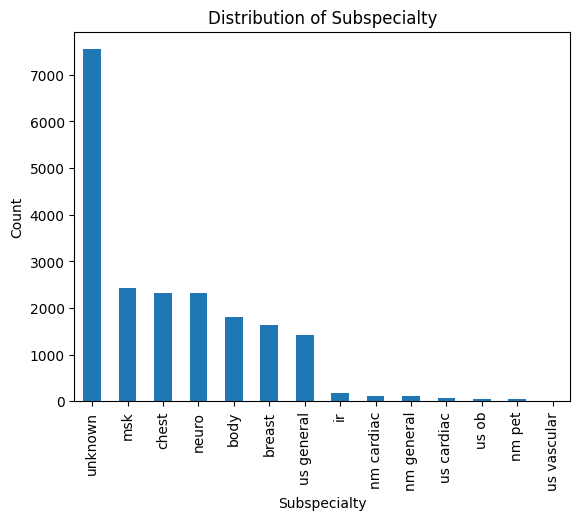

In [ ]:
# Visualize the Subspecialty column
df['Subspecialty'].value_counts().plot(kind='bar')
plt.title("Distribution of Subspecialty")
plt.xlabel("Subspecialty")
plt.ylabel("Count")
plt.show()

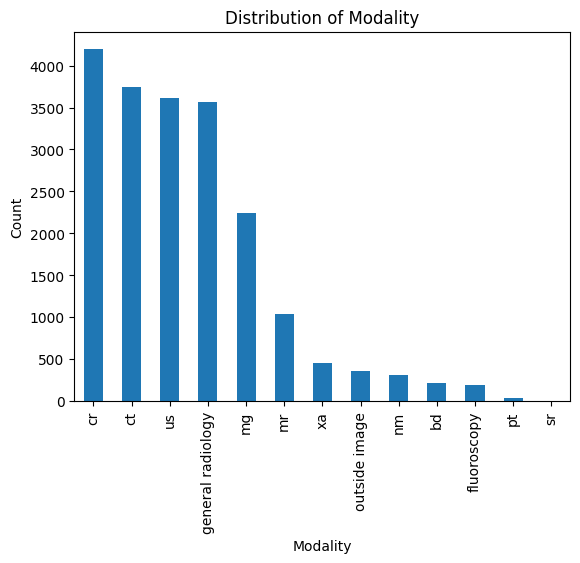

In [ ]:
# Visualize the Modality column
df['Modality'].value_counts().plot(kind='bar')
plt.title("Distribution of Modality")
plt.xlabel("Modality")
plt.ylabel("Count")
plt.show()

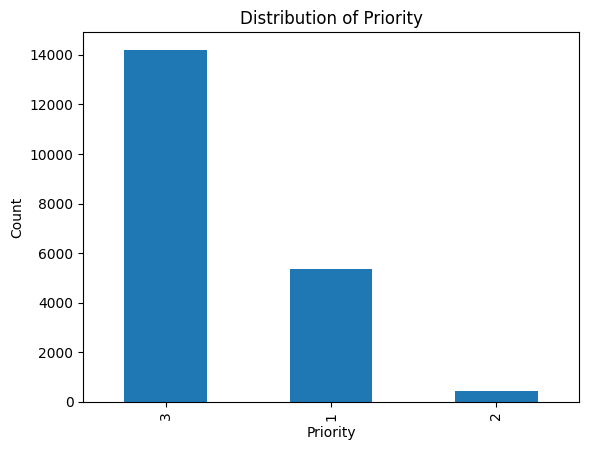

In [ ]:
# Visualize the priority column
df['Priority'].value_counts().plot(kind='bar')
plt.title("Distribution of Priority")
plt.xlabel("Priority")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

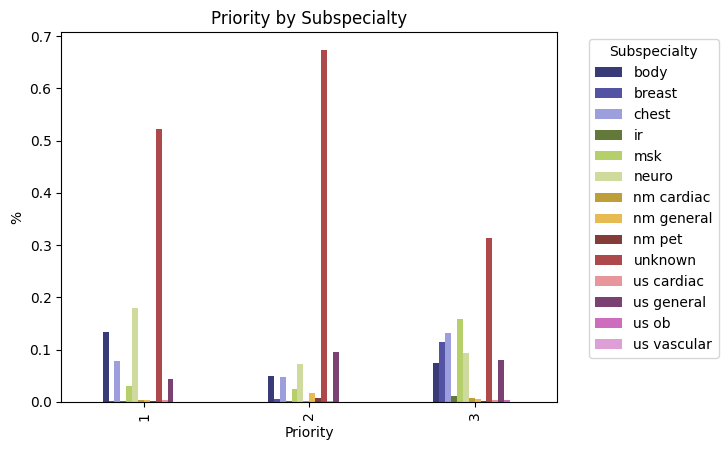

In [ ]:
# Visualize the priority column by Subspecialty
plt.figure(figsize=(10, 6))  # Adjust the figure size
# Group the data by 'Priority' and 'Subspecialty' columns and calculate the normalized value counts
grouped = df.groupby(['Priority'])['Subspecialty'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', cmap='tab20b')
plt.title('Priority by Subspecialty')
plt.xlabel('Priority')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subspecialty')
plt.show()


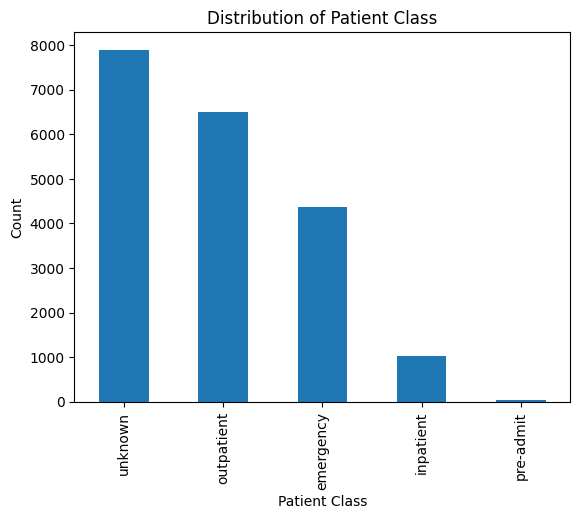

In [ ]:
# Visualize the Patient Class column
df['Patient Class'].value_counts().plot(kind='bar')
plt.title("Distribution of Patient Class")
plt.xlabel("Patient Class")
plt.ylabel("Count")
plt.show()

<Figure size 1000x600 with 0 Axes>

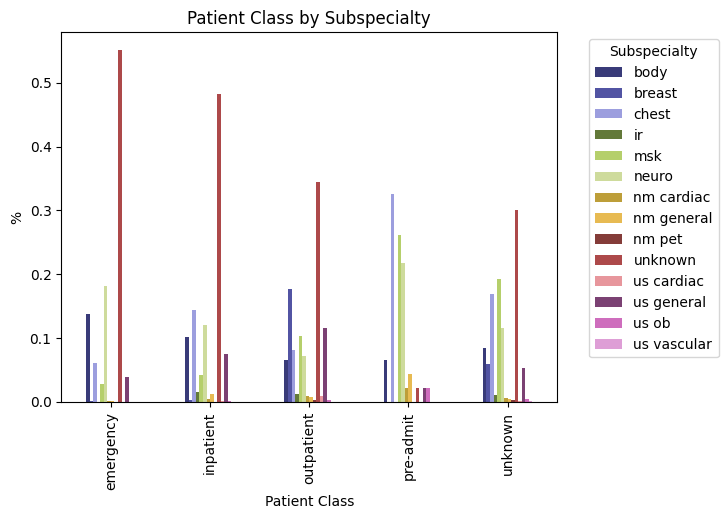

In [ ]:
# Visualize the Patient Class column by Subspecialty
plt.figure(figsize=(10, 6))  # Adjust the figure size
# Group the data by 'Priority' and 'Subspecialty' columns and calculate the normalized value counts
grouped = df.groupby(['Patient Class'])['Subspecialty'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', cmap='tab20b')
plt.title('Patient Class by Subspecialty')
plt.xlabel('Patient Class')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Subspecialty')
plt.show()

<Figure size 1000x600 with 0 Axes>

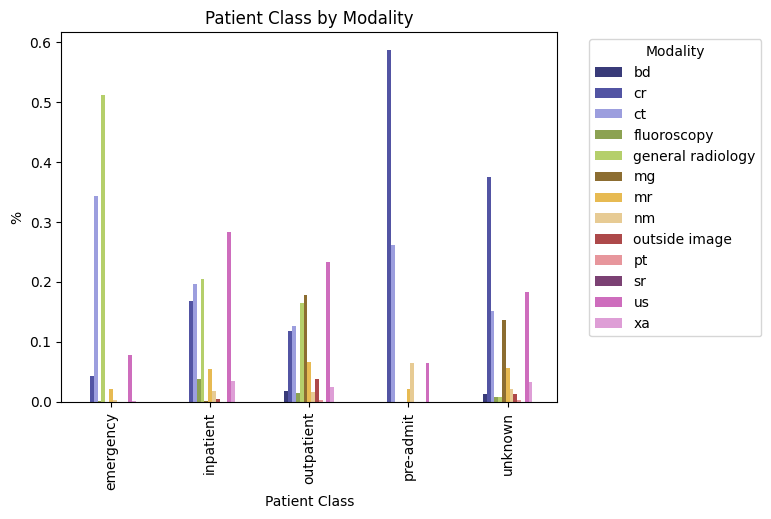

In [ ]:
# Visualize the Patient Class column by Modality
plt.figure(figsize=(10, 6))  # Adjust the figure size
# Group the data by 'Priority' and 'Subspecialty' columns and calculate the normalized value counts
grouped = df.groupby(['Patient Class'])['Modality'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', cmap='tab20b')
plt.title('Patient Class by Modality')
plt.xlabel('Patient Class')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Modality')
plt.show()

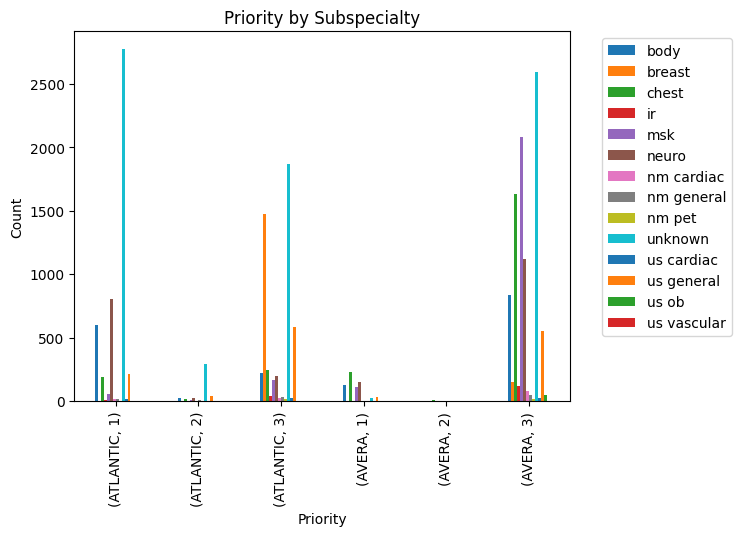

<Figure size 1000x1000 with 0 Axes>

In [ ]:
#Visualising the priority column in division to subspecialties and customers
grouped = df.groupby(['Tenant DESC', 'Priority'])['Subspecialty'].value_counts().unstack().plot(kind='bar')
plt.title('Priority by Subspecialty')
plt.xlabel('Priority')
plt.ylabel('Count')
# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figure(figsize=(10, 10))  # Adjust the figure size if desired
plt.show()

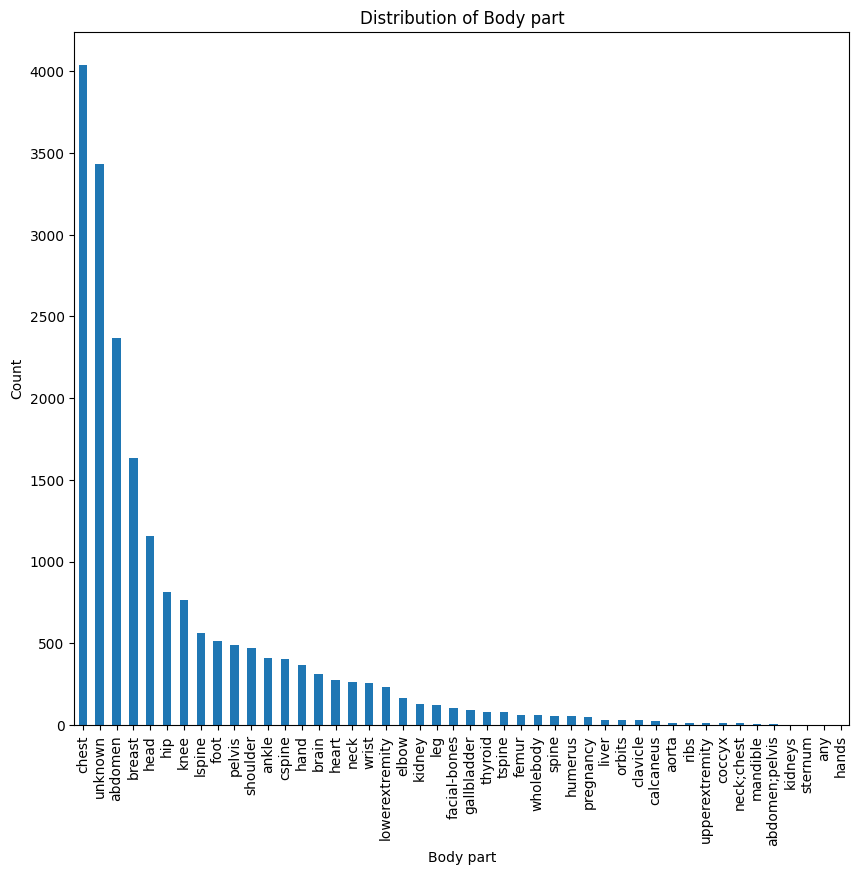

In [ ]:
# Visualize the Body part column
plt.figure(figsize=(10, 9))
df['Body Part'].value_counts().plot(kind='bar')
plt.title("Distribution of Body part")
plt.xlabel("Body part")
plt.ylabel("Count")
plt.show()

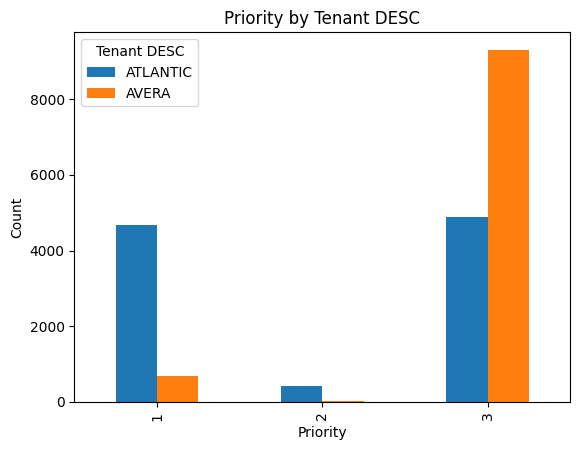

In [ ]:
#Visualising the priority column in division to customers
grouped = df.groupby(['Priority'])['Tenant DESC'].value_counts().unstack().plot(kind='bar')
plt.title('Priority by Tenant DESC')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

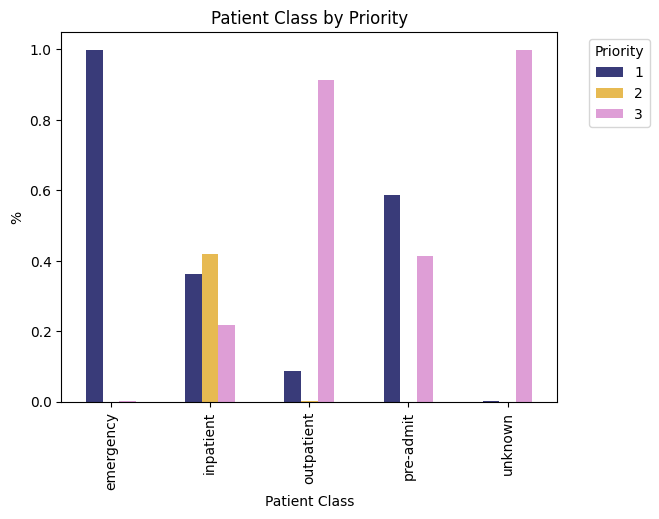

In [ ]:
# Visualize the Patient Class column by Priority
plt.figure(figsize=(10, 6))  # Adjust the figure size
# Group the data by 'Patient Class' and 'Priority' columns and calculate the normalized value counts
grouped = df.groupby(['Patient Class'])['Priority'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', cmap='tab20b')
plt.title('Patient Class by Priority')
plt.xlabel('Patient Class')
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Priority')
plt.show()

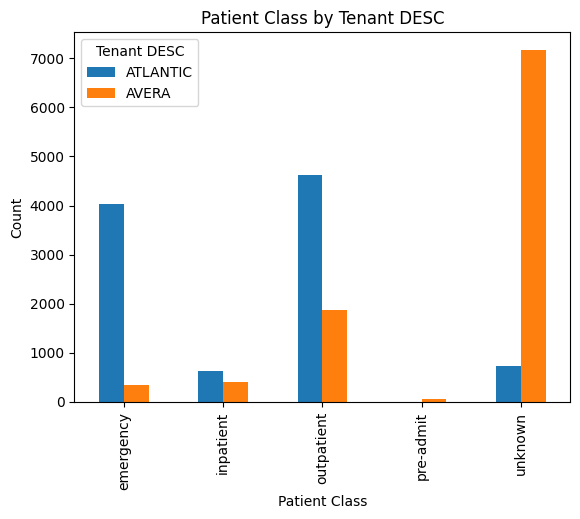

In [ ]:
#Visualize the 'Patient Class' column in division to customer
grouped = df.groupby(['Patient Class'])['Tenant DESC'].value_counts().unstack().plot(kind='bar')
plt.title('Patient Class by Tenant DESC')
plt.xlabel('Patient Class')
plt.ylabel('Count')
plt.show()


In [ ]:
df

,Tenant DESC,Priority,Patient Class,Exam Description,Modality,Body Part,Subspecialty
0,AVERA,3,inpatient,MRI brain wo IV,mr,brain,neuro
1,AVERA,3,outpatient,XR knee BI 4V,cr,knee,msk
2,AVERA,3,inpatient,XR chest 1V portable,cr,chest,chest
3,AVERA,3,outpatient,US Thyroid,us,thyroid,us general
4,AVERA,3,outpatient,XR hand LT min 3V,cr,hand,msk
...,...,...,...,...,...,...,...
19995,ATLANTIC,3,outpatient,BREAST SCREENING W/TOMO; BILATERAL; WOC,mg,breast,breast
19996,ATLANTIC,1,emergency,"FOOT,COMP (MIN 3 VIEWS); RIGHT",general radiology,foot,unknown
19997,ATLANTIC,3,outpatient,"BONE DENSITY, SPINE & HIP; WOC",outside image,hip,unknown
19998,ATLANTIC,3,outpatient,"BIOPSY, THYROID; PERCUTANEOUS CORE NEEDLE, ULT...",us,breast,breast


In [ ]:
df['Exam Description'] = df['Exam Description'].str.lower()
df

,Tenant DESC,Priority,Patient Class,Exam Description,Modality,Body Part,Subspecialty
0,AVERA,3,inpatient,mri brain wo iv,mr,brain,neuro
1,AVERA,3,outpatient,xr knee bi 4v,cr,knee,msk
2,AVERA,3,inpatient,xr chest 1v portable,cr,chest,chest
3,AVERA,3,outpatient,us thyroid,us,thyroid,us general
4,AVERA,3,outpatient,xr hand lt min 3v,cr,hand,msk
...,...,...,...,...,...,...,...
19995,ATLANTIC,3,outpatient,breast screening w/tomo; bilateral; woc,mg,breast,breast
19996,ATLANTIC,1,emergency,"foot,comp (min 3 views); right",general radiology,foot,unknown
19997,ATLANTIC,3,outpatient,"bone density, spine & hip; woc",outside image,hip,unknown
19998,ATLANTIC,3,outpatient,"biopsy, thyroid; percutaneous core needle, ult...",us,breast,breast


In [ ]:
df['Patient Class']=df['Patient Class'].fillna('unknown')

In [ ]:
df['Patient Class'].value_counts()

unknown       8076
outpatient    6501
emergency     4357
inpatient     1020
pre-admit       46
Name: Patient Class, dtype: int64

In [ ]:
# Update of 'Patient Class' column to 'outpatient' for rows where the 'Patient Class' is 'unknown' and the 'Modality' is 'mg'
for index, row in df.iterrows():
  if row['Patient Class'] == 'unknown' and row['Modality'] == 'mg':
    df.at[index, 'Patient Class'] ='outpatient'
print (df['Patient Class'].value_counts())

outpatient    7595
unknown       6982
emergency     4357
inpatient     1020
pre-admit       46
Name: Patient Class, dtype: int64


In [ ]:
# Update of 'Patient Class' value to 'outpatient' if the word 'outside' is present in the column Exam Description
for index, row in df.iterrows():
    words = row['Exam Description'].split()
    if "outside" in words:
        df.at[index, 'Patient Class'] = 'outpatient'

print(df['Patient Class'].value_counts())

outpatient    7741
unknown       6836
emergency     4357
inpatient     1020
pre-admit       46
Name: Patient Class, dtype: int64


In [ ]:
df['Avera_Urgency'] = np.nan

In [ ]:
#create urgency score according to "Avera" rules, for all subjects

def get_urgency_score(df):
    """
    Calculates the urgency score based on priority and exam description for each record in a DataFrame.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing columns 'Priority', 'Patient Class', and 'Exam Description'.

    Returns:
        pandas.Series: The urgency scores as a Series.

    Urgency Score Calculation:
        - For 'outpatient' cases:
            - Priority 1: 22
            - Priority 2: 46
            - Priority 3: 58
        - For 'inpatient' cases:
            - Priority 1: 26
            - Priority 2: 42
            - Priority 3: 54
        - For 'emergency' cases: 10
        - If the exam description contains any of the keywords in the 'Exam_Desc' list (case-insensitive):
            - Urgency score is set to 1.
    """
    Exam_Desc = ['head', 'brain', 'stroke']
    df['Avera_Urgency'] = None  # initialize the column with None values

    for index, row in df.iterrows():
          exam_desc = row['Exam Description']
          if row['Patient Class'] == 'outpatient':
              if row['Priority'] == 1:
                  df.loc[index, 'Avera_Urgency'] = 22
              elif row['Priority'] == 2:
                  df.loc[index, 'Avera_Urgency'] = 46
              elif row['Priority'] == 3:
                  df.loc[index, 'Avera_Urgency'] = 58
          elif row['Patient Class'] == 'inpatient':
              if row['Priority'] == 1:
                  df.loc[index, 'Avera_Urgency'] = 26
              elif row['Priority'] == 2:
                  df.loc[index, 'Avera_Urgency'] = 42
              elif row['Priority'] == 3:
                  df.loc[index, 'Avera_Urgency'] = 54
          elif row['Patient Class'] == 'emergency':
            df.loc[index, 'Avera_Urgency'] = 10

            # Check if any part of the values in 'Exam_Desc' list appears in the exam description
            if any((keyword.lower() in exam_desc.lower()) for keyword in Exam_Desc):
                df.at[index, 'Avera_Urgency'] = 1

    return df['Avera_Urgency']


In [ ]:
df['Avera_Urgency'] = get_urgency_score(df)

In [ ]:
# replace NaN values with 0 in Avera_Urgency column
df['Avera_Urgency']=df['Avera_Urgency'].fillna(0).astype(int)

In [ ]:
df['Avera_Urgency'].value_counts()

58    7170
0     6882
10    3828
22     566
1      529
42     428
26     369
54     223
46       5
Name: Avera_Urgency, dtype: int64

In [ ]:
df['Atlantic_Urgency'] = np.nan

In [ ]:
#create urgency score according to "Atlantic" rules, for all subjects

def get_urgency_score2(df):
    """
    Calculates the urgency score based on priority, patient class, modality, and exam description for each record in a DataFrame,
    following the 'Atlantic' rules.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing columns 'Priority', 'Patient Class', 'Modality', and 'Exam Description'.

    Returns:
    pandas.Series: The urgency scores as a Series.

    Urgency Score Calculation:
        - For 'outpatient' cases:
            - Priority 1: 40
            - Priority 3: 90
        - For 'inpatient' cases:
            - Priority 1: 40
            - Priority 2: 50
            - Priority 3: 60
        - For 'emergency' cases: 30
        - If 'mg' is present in the modality: 91
        - If 'stroke' is present in the exam description (case-insensitive): 1
    """
    df['Atlantic_Urgency'] = None  # initialize the column with None values
    pattern = r'\bstroke\b'

    for index, row in df.iterrows():
        if row['Patient Class'] == 'outpatient':
          if row['Priority'] == 1:
            df.loc[index, 'Atlantic_Urgency'] = 40
          elif row['Priority'] == 3:
            df.loc[index, 'Atlantic_Urgency'] = 90
        elif row['Patient Class'] == 'inpatient':
          if row['Priority'] == 1:
            df.loc[index, 'Atlantic_Urgency'] = 40
          elif row['Priority'] == 2:
            df.loc[index, 'Atlantic_Urgency'] = 50
          elif row['Priority'] == 3:
            df.loc[index, 'Atlantic_Urgency'] = 60
        elif row['Patient Class'] == 'emergency':
          df.loc[index, 'Atlantic_Urgency'] = 30
        elif 'mg' in row['Modality']:
          df.loc[index, 'Atlantic_Urgency'] = 91
        if pd.Series(row['Exam Description']).str.contains('stroke', case=False).any():
          df.loc[index, 'Atlantic_Urgency'] = 1
    return df['Atlantic_Urgency']


In [ ]:
df['Atlantic_Urgency'] = get_urgency_score2(df)

In [ ]:
# replace NaN values with 0 in Atlantic_Urgency column
df['Atlantic_Urgency']=df['Atlantic_Urgency'].fillna(0).astype(int)

In [ ]:
df['Atlantic_Urgency'].value_counts(dropna=False)

90    7170
0     6869
30    4276
40     930
50     428
60     223
1      104
Name: Atlantic_Urgency, dtype: int64

In [ ]:
# Creating a new column of "Average_Urgency" based on Avera&Atlantic urgency, exsept for the mentioned scores.

scores = [0, 1, 20, 91]

def create_average(df):
    """
    Creates a new column 'Average_Urgency' in the DataFrame based on the 'Atlantic_Urgency' and 'Avera_Urgency' columns,
    excluding the mentioned scores.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing columns 'Atlantic_Urgency' and 'Avera_Urgency'.

    Returns:
     pandas.Series: The average urgency scores as a Series.

    Average Urgency Calculation:
        - If both 'Atlantic_Urgency' and 'Avera_Urgency' are not in the scores list:
            - The average urgency is calculated as the mean of 'Atlantic_Urgency' and 'Avera_Urgency' (skipping NaN values).
        - If either 'Atlantic_Urgency' or 'Avera_Urgency' is present in the scores list:
            - The average urgency is set to the corresponding score from the scores list.
        - The mentioned scores [0, 1, 20, 91] are excluded from the average calculation.
    """
    df['Average_Urgency'] = None
    for index, row in df.iterrows():
        atlantic = row['Atlantic_Urgency']
        avera = row['Avera_Urgency']
        if all(num not in [atlantic, avera] for num in scores):
            avg_urgency = pd.Series([atlantic, avera]).mean(skipna=True)
            df.loc[index, 'Average_Urgency'] = avg_urgency
        else:
            for num in scores:
                if num in [atlantic, avera]:
                    df.loc[index, 'Average_Urgency'] = num
                    break

    return df['Average_Urgency']


In [ ]:
df['Average_Urgency'] = create_average(df)

In [ ]:
df['Average_Urgency'] = df['Average_Urgency'].astype(int)

In [ ]:
df['Average_Urgency'].unique()

array([57, 74,  0, 33,  1, 20, 31, 46])

In [ ]:
df['Average_Urgency'].value_counts()

74    7170
0     6887
20    3828
31     565
1      534
46     428
33     365
57     223
Name: Average_Urgency, dtype: int64

In [ ]:
df

,Tenant DESC,Priority,Patient Class,Exam Description,Modality,Body Part,Subspecialty,Avera_Urgency,Atlantic_Urgency,Average_Urgency
0,AVERA,3,inpatient,mri brain wo iv,mr,brain,neuro,54,60,57
1,AVERA,3,outpatient,xr knee bi 4v,cr,knee,msk,58,90,74
2,AVERA,3,inpatient,xr chest 1v portable,cr,chest,chest,54,60,57
3,AVERA,3,outpatient,us thyroid,us,thyroid,us general,58,90,74
4,AVERA,3,outpatient,xr hand lt min 3v,cr,hand,msk,58,90,74
...,...,...,...,...,...,...,...,...,...,...
19995,ATLANTIC,3,outpatient,breast screening w/tomo; bilateral; woc,mg,breast,breast,58,90,74
19996,ATLANTIC,1,emergency,"foot,comp (min 3 views); right",general radiology,foot,unknown,10,30,20
19997,ATLANTIC,3,outpatient,"bone density, spine & hip; woc",outside image,hip,unknown,58,90,74
19998,ATLANTIC,3,outpatient,"biopsy, thyroid; percutaneous core needle, ult...",us,breast,breast,58,90,74


In [ ]:
df.to_csv("Avera & Atlantic Data.csv")